## Memahami Faktor-Faktor Kesuksesan Suatu Video Game dari Toko Online "Ice"

### Pendahuluan

Pada proyek ini, kami akan melakukan analisis data terkait penjualan dan ulasan video game dari toko online "Ice". Dataset yang digunakan mencakup informasi tentang berbagai aspek game, seperti platform, tahun rilis, genre, penjualan di berbagai wilayah, skor ulasan kritikus, skor ulasan pengguna, dan rating ESRB. Dengan dataset ini, kami bertujuan untuk mengidentifikasi pola-pola yang dapat membantu kami memahami faktor-faktor yang memengaruhi kesuksesan suatu game.


### Tujuan 

  Menganalisis Tren Penjualan: Tujuan utama proyek ini adalah untuk menganalisis tren penjualan video game di berbagai wilayah, termasuk Amerika Utara, Eropa, dan Jepang. Kami akan mencoba memahami bagaimana preferensi pasar berbeda-beda di seluruh dunia.

- Menentukan Faktor Kesuksesan Game: Kami akan mencoba mengidentifikasi faktor-faktor yang berkontribusi terhadap kesuksesan suatu game, baik dari segi penjualan maupun ulasan. Ini termasuk memeriksa hubungan antara skor ulasan kritikus, skor ulasan pengguna, genre, platform, dan rating ESRB dengan penjualan game.

- Merencanakan Kampanye Iklan: Melalui pemahaman yang kami peroleh dari analisis data, kami akan merencanakan kampanye iklan yang lebih efektif untuk game-game yang memiliki potensi tinggi. Hal ini akan membantu toko online "Ice" dalam meningkatkan penjualan dan memaksimalkan keuntungan.

## Inisialisasi

In [303]:
# list library yang digunakan

from scipy import stats as st
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from scipy.stats import ttest_ind
from scipy.stats import shapiro

## Memuat Data

In [304]:
#Memuat dataframe

games_data = pd.read_csv("/datasets/games.csv")

## Mempersiapkan Data

Pada bagian ini kita akan mempersiapkan dataset yang akan digunakan. Pemanggilan variabel games_data akan banyak melibatkan pembersihan data, memeriksa kesesuaian tipe data dan hal lainnya dan untuk itu perlu dimanipulasi supaya sesuai dengan analisis.

## Deskripsi & Informasi Data

In [305]:
#Menampilkan informasi data

games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Penjelasan Kolom**

`name` = Nama

`Platform` = Nama platform

`Year_of_Release` = Tahun Rilis

`Genre` = Genre

`NA_sales` = Penjualan di Amerika Utara dalam satuan juta USD

`EU_sales` = Penjualan di Eropa dalam satuan juta USD

`JP_sales` = Penjualan di Jepang dalam satuan juta USD

`Other_sales` = Penjualan di negara lainnya dalam satuan juta USD

`Critic_Score` = Skor ulasan dari kritikus, maksimal 100

`User_Score` = Skor ulasan dari pengguna, maksimal 100

`Rating` = ESRB atau rating untuk kategori umur


**Finding**

Diketahui dari data diatas terdapat 16715 entries, dan memiliki 11 kolom. Lalu terdapat nilai kosong dari beberapa kolom antara lain; `name`, `Year_of_Release`, `Critic_score`, `User_score`, `Rating`.

**Insight**

Ada kemungkinan dari data diatas terdapat tipe data yang kurang sesuai dan diperlukannya analisa lebih lanjut, lalu memeriksa apakah terdapat nama - nama kolom yang memiliki karakter yang kurang tidak rapih atau tidak sama untuk semua kolom. Dan akan diganti dengan lowercase untuk menyamaratakan huruf pada data - data diatas 

In [306]:
#Memeriksa isi data

games_data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [307]:
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [308]:
games_data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Finding**

Dapat dilihat dari data di atas bahwasannya nilai yang hilang pada data diatas memiliki pola yang identik atau simetris. Ada nya kemungkinan ketika data sedang di konversikan atau pemprosesan lainnya terdapat masalah.

In [309]:
#Memeriksa duplicate

games_data.drop_duplicates(inplace=True)

## Nilai yang Hilang

In [310]:
#Memeriksa jumlah nilai yang hilang

games_data_missing_values = games_data.isna().sum()
games_data_missing_values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Dari data diatas terlihat bahwasannya ada lima kolom nilai yang hilang.

`name`  2 

`Year_of_Release`  269

`Genre`  2

`Critic_Score`  8578

`User_Score`  6701

`Rating`  6766


In [311]:
#Menampilkan data jumlah sample nilai yang hilang

games_data_missing_rows = games_data[games_data.isna().any(axis = 1)]
games_data_missing_rows.sample(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13271,Finny the Fish & the Seven Waters,PS2,2004.0,Sports,0.02,0.02,0.00,0.01,NaN,NaN,NaN
10009,Merv Griffin's Crosswords,Wii,2008.0,Puzzle,0.11,0.00,0.00,0.01,NaN,tbd,E
4567,Crash: Mind Over Mutant,PSP,2008.0,Platform,0.11,0.20,0.00,0.11,NaN,6.5,E10+
10838,Whacked!,XB,2002.0,Misc,0.07,0.02,0.00,0.00,NaN,NaN,NaN
11139,Naruto Shippuden: Gekito Ninja Taisen! EX 2,Wii,2007.0,Fighting,0.00,0.00,0.09,0.00,NaN,NaN,NaN
9414,Nagano Winter Olympics '98,PS,1997.0,Sports,0.07,0.05,0.00,0.01,NaN,NaN,NaN
9769,Medarot DS: Kabuto / Kuwagata Ver.,DS,2010.0,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,NaN
14430,Nishijin Pachinko Monogatari 2,SNES,1996.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
15400,Negima!? Chou Mahora Taisen Chuu: Checkiin Zen...,DS,2007.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
15548,Otoko Yukaku,PSV,2015.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN


Terlihat dari data diatas bahwasannya data yang hilang tidak terlihat simetris. Beberapa baris sedikitnya memiliki data nilai yang kosong berbeda dengan kolom yang lainnya ( Data yang kosong tidak serupa)

## Manipulasi Data

Data akan diubah untuk dapat diteliti lebih dalam lagi untuk mengetahui langkah apa yang selanjutnya akan dilakukan.

In [312]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Menggati Nama Kolom Menggunakan Lowercase

Mengganti nama kolom menggunakan lowercase guna untuk memudahkan memanggil kolom. 

In [313]:
#Mengubah nama semua kolom dalam games_data menjadi lowercase

games_data.columns = games_data.columns.str.lower()
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [314]:
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Memanipulasi Data yang Tidak Relevan

In [315]:
# Memanipulasi data yang tidak relevan.
games_data = games_data.loc[(games_data['year_of_release'].notna()) & (games_data['year_of_release'] >= 2000)]
games_data = games_data.reset_index(drop=True)


Disini kita akan menghapus data yang tidak relevan. Dikarenakan kita kan memulai dari tahun 2000 hingga tahun 2016

### Mengkonversi Tipe Data yang Dibutuhkan 

In [316]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  float64
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       9738 non-null   object 
 10  rating           9663 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


In [317]:
games_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E


In [318]:
#Mengubah tipe data pada kolom year_of_release

games_data.dropna(subset=['year_of_release'], inplace=True)
games_data['year_of_release'] = games_data['year_of_release'].astype('int64')


In [319]:
#Memeriksa tipe data object pada kolom user_score
games_data[games_data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
92,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
231,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
408,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
507,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
560,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
14450,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
14452,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
14453,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
14459,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


data pada kolom `user_score` memiliki tipe data object dimana object tersebut tidak hanya suatu angka tetapi ditulis sebagi `tbd (to be determined)`, lalu disini akan diubah menjadi tipe data float dikarenakan melihat adanya hasil yang desimal pada dasarnya .

In [320]:
#Mengubah tipe data kolom user_score
games_data['user_score'].replace('tbd', np.nan, inplace=True)
games_data['user_score'] = games_data['user_score'].astype('float64')*10

Nilai `tbd` akan diubah menjadi NaN, `to be determined`  merupakan hal yang tidak berpengaruh dalam perhitungan analisa, karena dapat menggangapnya belum ada penilaian atau nilai memang kosong.

### Menjumlahkan Penjualan di Semua Wilayah

Dari bagian manipulasi data, kita akan menambahkan 1 lagi yaitu menjumlahkan penjualan di semua wilayah, dengan nama kolom `total_sales`.

In [321]:
#Menjumlahkan penjualan pada setiap wilayah untuk setiap game
games_data['total_sales'] = games_data[['na_sales', 'eu_sales','jp_sales','other_sales']].sum(axis=1)

Tidak terdapat nilai hilang pada kolom `na_sales`, `eu_sales`, `jp_salaes`, dan `other_sales`, maka dapat di jumlahkan seluruhnya untuk menghasilkan kolom baru yaitu `total_sales`.

In [322]:
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [323]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14470 entries, 0 to 14469
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       7371 non-null   float64
 10  rating           9663 non-null   object 
 11  total_sales      14470 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


In [324]:
games_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91


**Kesimpulan Sementara**

Untuk saat ini tidak perlu mengubah beberapa dari kolom penjualan. Hal itu dirasa sudah sesuai, dikarenakan pada dasarnya nilai bawaannya lebih dominan di tipe data float. Kita mungkin harus mengubah tipe data `year_of_release` sebagai `int64` supaya mudah untuk memfilter tahun. Menggunakan `pd.to_datetime` merupakan hal yang tidak direkomendasikan, dikarenakan memiliki detail tanggal. Di sini kita hanya memerlukan tahun rilisnya saja. Kita bisa lihat sekarang kita memiliki tahun yang sudah dipotong yaitu hanya yang relevan pada tahun 2000 hingga 2016. Sehingga entry data sekarang menjadi 16446. Sekarang kita masih memiliki 3 kolom yang nilainya masih hilang.

## Menangani Nilai yang Hilang

In [325]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14470 entries, 0 to 14469
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14470 non-null  object 
 1   platform         14470 non-null  object 
 2   year_of_release  14470 non-null  int64  
 3   genre            14470 non-null  object 
 4   na_sales         14470 non-null  float64
 5   eu_sales         14470 non-null  float64
 6   jp_sales         14470 non-null  float64
 7   other_sales      14470 non-null  float64
 8   critic_score     7887 non-null   float64
 9   user_score       7371 non-null   float64
 10  rating           9663 non-null   object 
 11  total_sales      14470 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


Melakukan pemeriksaan nilai yang hilang mengurut berdasarkan nilai yang hilang. Kita akan mengabaikan nilai kosong yang jumlahnya sedikit, seperti pada kolom `name` dan `genre`, dikarenakan dengan jumlah hilang yang dibilang sangat sedikit, tidak begitu memengaruhi analisa.

In [326]:
games_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91


### critic_score

In [327]:
games_data['critic_score'].min(), games_data['critic_score'].max()

(13.0, 98.0)

### user_score

In [328]:
games_data['user_score'].min(), games_data['user_score'].max()

(0.0, 97.0)

In [329]:
# Menggantikan nilai-nilai NaN dalam kolom 'user_score' dengan nilai-nilai acak dalam rentang 0 hingga 97
random_user = np.random.randint(0, 97, size=len(games_data['user_score']))
games_data['user_score'] = games_data['user_score'].fillna(pd.Series(random_user))

In [330]:
games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
14465,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,8.0,NaN,0.01
14466,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,94.0,NaN,0.01
14467,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,18.0,NaN,0.01
14468,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,67.0,NaN,0.01


<div class="alert alert-danger">
<b>Fachri's comment v.1</b> <a class="tocSkip"></a>

Sebaiknya untuk score biarkan saja NaN karena apabila dengan nilai random akan membuat distorsi pada data    
</div>

**Kesimpulan Sementara**

Untuk kolom `critic_score` dan `user_score` nilai hilang telah di isi dengan nilai acak.

## Menganalisa Data

### Menganalisa Berapa Banyak Game yang Akan Diluncurkan Tahun Depan ? 


Tahap pertama untuk menganalisa ialah melakukan agregasi pada game yang bermuculan di tahun yang berbeda.

In [331]:
# menghitung jumlah game yang diluncurkan di tahun yang berbeda
game_year_count = pd.pivot_table(games_data, index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
game_year_count

,year_of_release,name
0,2000,350
1,2001,482
2,2002,829
3,2003,775
4,2004,762
5,2005,939
6,2006,1006
7,2007,1197
8,2008,1427
9,2009,1426


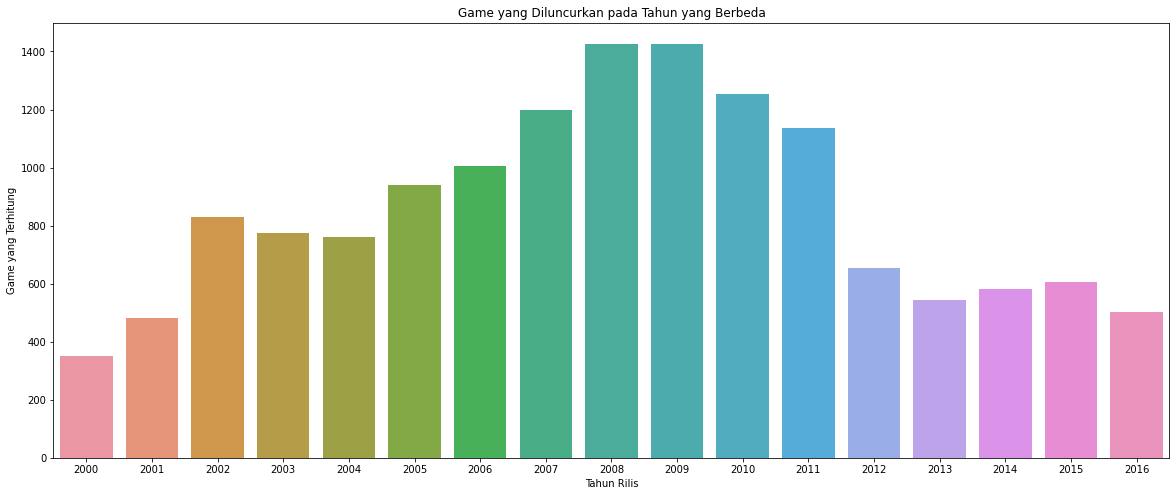

In [332]:
plt.figure(figsize = (20,8))
sns.barplot(data=game_year_count, x = 'year_of_release', y = 'name')
plt.title('Game yang Diluncurkan pada Tahun yang Berbeda')
plt.xlabel('Tahun Rilis')
plt.ylabel('Game yang Terhitung')
plt.show()

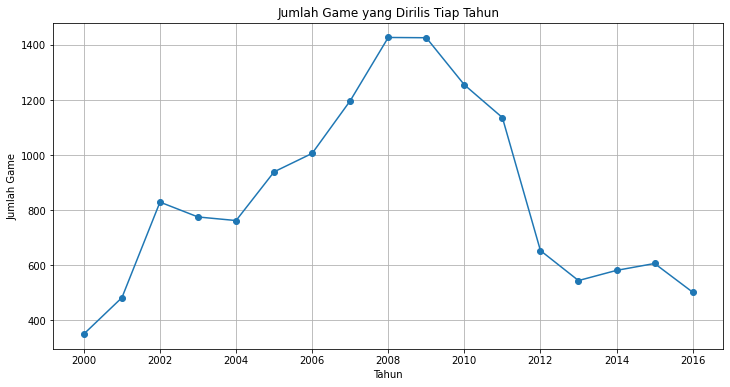

In [333]:
# Mengambil data jumlah game yang dirilis tiap tahun
year = games_data['year_of_release'].value_counts().sort_index().index
games_count = games_data['year_of_release'].value_counts().sort_index().values

# Membuat grafik garis
plt.figure(figsize=(12, 6))
plt.plot(year, games_count, marker='o', linestyle='-')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Game yang Dirilis Tiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Game')

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()

Dapat dilihat dari grafik diatas bahwasannya jumlah games yang dirilis dari tahun 2000 hingga 2016 mengalami fluktasi, pada tahun 2008 jumlah games yang dirilis sangat banyak yaitu dengan total 1400 games. Dan jumlah games yang paling sedikit dirilis yaitu pada tahun 2000 dengan jumlah games kurang dari 400 games.Dan pada tahun 2010 hingga ke tahun 2019 jumlah games yang dirilis mengalami penurunan yang cukup signifikan. 

### Bagaimana Penjualan Bervariasi dari Satu Platform ke Platform Lainnya ? 

Memilih platform dengan total penjualan nya tinggi dan membuat distribusinya berdasarkan data pertahun. Step pertama ialah mencari platform yang terpopuler, lalu mencari berapa lama biasanya waktu yang dibutuhkan platform baru untuk muncul dan untuk platform lama untuk memudar popularitasnya?

Lalu melihat bagaimana penjualan bervariasi dari satu platform ke platform lainnya. Pilih platform dengan total penjualan terbesar dan buat distribusinya berdasarkan data per tahun.

In [334]:
#Menjumlahkan jumlah popularitas untuk semua game
games_data_lifetime = pd.pivot_table(data = games_data, index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum').fillna(0)



In [335]:
games_data_lifetime

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2000,0.00,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.68,0.00,0.00,0.00,0.99,0.00
2001,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2002,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00
2004,0.00,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,65.42,0.00
2005,0.00,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.00,0.00,43.84,0.00,0.00,0.00,0.00,8.25,49.08,0.00
2006,0.00,0.00,119.81,0.00,5.28,11.26,0.00,2.85,0.00,103.42,20.96,0.00,55.32,0.00,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.00,0.02,146.94,0.00,3.40,0.27,0.00,9.28,0.00,75.99,73.19,0.00,46.93,0.00,0.00,152.77,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.31,0.00,0.00,0.00,0.00,12.42,0.00,53.90,118.52,0.00,34.55,0.00,0.00,171.32,0.00,135.26,0.18,0.00


 Mengasumsikan untuk lifetime setiap console dan total penjualan untuk setiap tahunnya.

<AxesSubplot:xlabel='platform'>

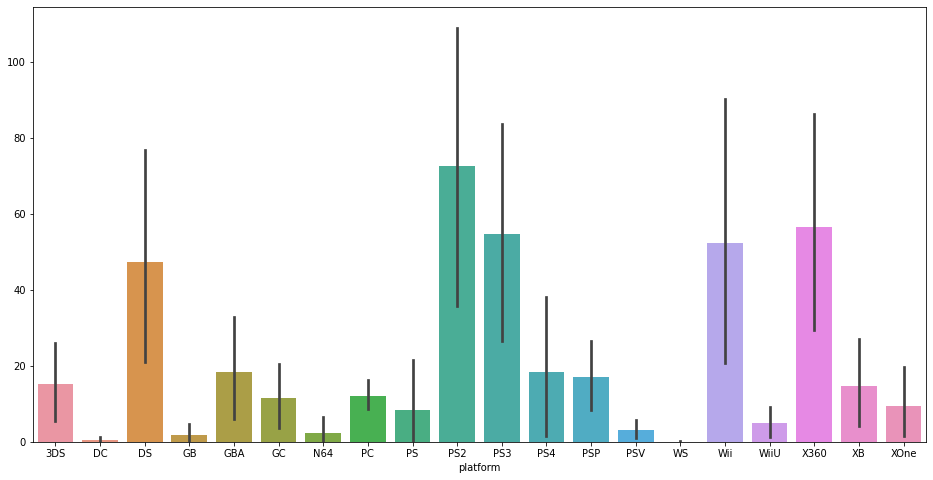

In [336]:
plt.figure(figsize = (16,8))
sns.barplot(data=games_data_lifetime)

Lalu mengambil beberapa sample yaitu `Wii`, `DS`, dan `X360` untuk mengetahui berapa lamanya popularitas console bertahan.

<AxesSubplot:xlabel='year_of_release'>

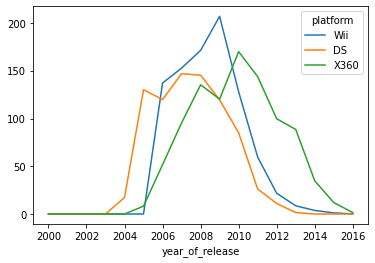

In [337]:
#Membuat lineplot untuk menampilkan 3 sample yang dipilih
games_data_lifetime[['Wii', 'DS', 'X360']].plot()

Dapat dilihat dari grafik diatas bahwasannya untuk platform `Wii`, `DS`, `X360` pernah mencapai puncak popularitas nya tetapi hampir tidak ada penjualan pada tahun 2016 serta masing - masing sample juga memiliki variasi terendiri yang fluktuatif. 

**Kesimpulan Sementara**


Dapat diambil kesimpulan bahwasannya naik nya popularitas diakibatkan oleh banyak nya total penjualan pada seetiap setahunnya.

Langkah selanjutnya memeriksa perplatform

In [338]:
games_data['platform'].value_counts()

PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PC       917
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
PS       274
XOne     247
WiiU     147
N64       70
DC        31
GB        27
WS         4
Name: platform, dtype: int64

Dari data diatas dapat `PS2` memiliki penjualan tertinggi dengan nilai penjualan 2127, setelah itu kita teliti untuk distribusi nya untuk menganalisa platform yang memiliki jumlah yang sangat banyak berdasarkan `value_count()`

In [339]:
# Menghitung total penjualan untuk setiap platform

platform_sales = games_data.groupby('platform')['total_sales'].sum().reset_index()


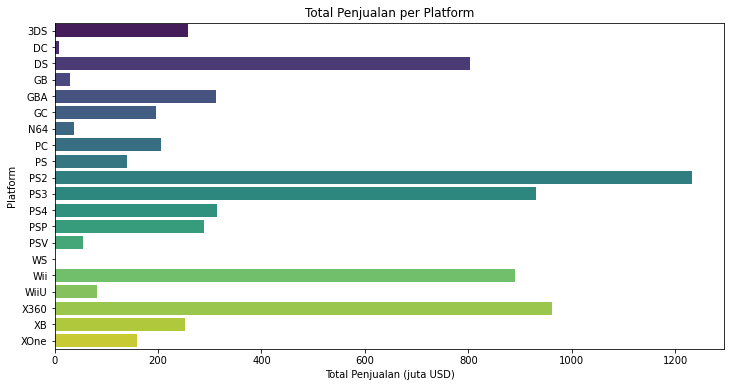

In [340]:
# Membuat bar plot visualisasi penjualan untuk platform
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='platform', data=platform_sales, palette='viridis')
plt.title('Total Penjualan per Platform')
plt.xlabel('Total Penjualan (juta USD)')
plt.ylabel('Platform')
plt.show()


Dari diagram diatas dapat dilihat bahwasannya platform `PS2` penjualannya lebih besar dibandingkan plaform lainnya. 

In [341]:
# Menemukan platform dengan total penjualan terbesar
big_platform = platform_sales[platform_sales['total_sales'] == platform_sales['total_sales'].max()]
print("Platform dengan Total Penjualan Terbesar :")
print(big_platform)


Platform dengan Total Penjualan Terbesar :
  platform  total_sales
9      PS2      1233.56


In [342]:
# Memilih data penjualan hanya untuk platform terbesar
big_platform_data = games_data[games_data['platform'] == big_platform['platform'].values[0]]

# Membuat distribusi penjualan per tahun
sales_platform_per_year = big_platform_data.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi Penjualan Per Tahun Untuk Platform Terbesar:")
print(sales_platform_per_year)


Distribusi Penjualan Per Tahun Untuk Platform Terbesar:
year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64


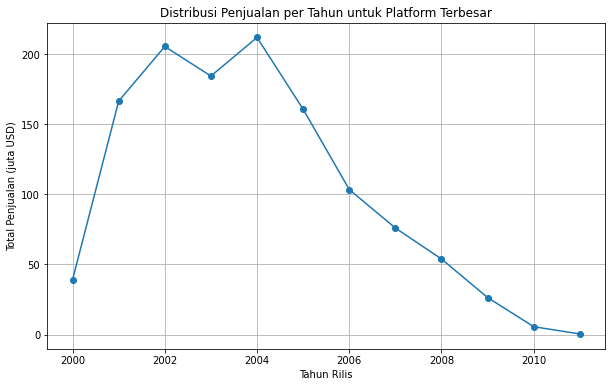

In [343]:
# Data distribusi penjualan per tahun
year = sales_platform_per_year.index
sales = sales_platform_per_year.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(year, sales, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Platform Terbesar')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan (juta USD)')
plt.grid(True)
plt.show()


**Kesimpulan Sementara**

Dari data sebelumnya bahwasannya platform terbesar pada penjualan game ini adalah `PS` dimana penjualan `PS2` ini memiliki penjualan tertinggi pada rentang tahun 2000 hingga 2004. Lalu penjualan menurun dimulai pada tahun 2005.

### Menentukan Periode Waktu Pengambilan Data

Untuk menentukan periode waktu pengambilan data, data yang kita ambil seharusnya memungkinkan untuk membangun model bagi tahun 2017.

In [344]:
# Mengambil sample data dari games_data

games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,28.91


Pada kasus ini tahap pertama yang dilakukan ialah memfilter kembali datanya. Mengambil data 5 tahun ke belakang. Maksimal yang didapat dari data yang sedang dikerjakan yaitu tahun 2016 yang berarti data yang akan diambil adalah data yang cukup relevan untuk mendukung tersebut yaitu memulai mengambil data dari tahun 2011.

In [345]:
# Membuat data yang mulai dari tahun 2011
games_data_2011 = games_data[games_data['year_of_release'] >= 2011].reset_index(drop=True)

In [346]:
# Bentuk data
games_data.shape ,  games_data_2011.shape

((14470, 12), (4022, 12))

### Mengerjakan Data yang Relevan

Sebelumnya kita sudah melakukan tahap menentukan model data yang ditentukan dengan menggunakan varibale data `games_data_2011`,

Sebelumnya kita sudah menentukan model data yang telah kita tentukan dengan menggunakan variable df_games_2011. Yang di mana kita akan mulai dari 5 tahun lalu untuk permodelan berikutnya. Sebelumnya relevansi data sudah kita hapus terlebih dahulu yaitu mengabaikan tahun-tahun. Karena sudah jelas, seluruh game yang di bawah tahun 2000 dipastikan tidak relevan.

In [347]:
# Menghitung total penjualan untuk setiap platform
sales_platform_2011 = games_data_2011.groupby('platform')['total_sales'].sum().reset_index()

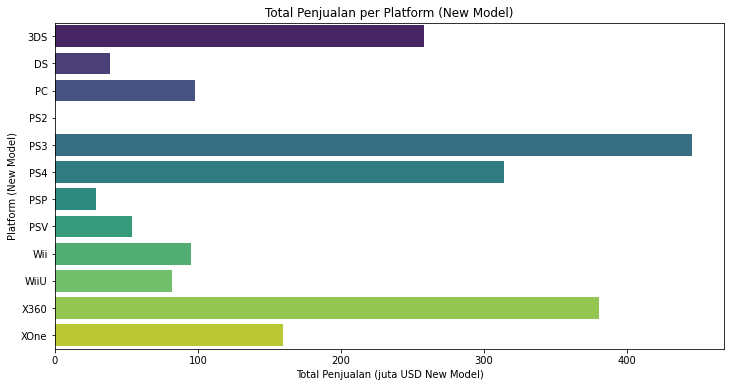

In [348]:
# Membuat bar plot visualisasi penjualan untuk platform
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='platform', data=sales_platform_2011, palette='viridis')
plt.title("Total Penjualan per Platform (New Model)")
plt.xlabel('Total Penjualan (juta USD New Model)')
plt.ylabel('Platform (New Model)')
plt.show()


**Kesimpulan Sementara**

Dari diagram diatas dapat dilihat bahwasannya model terbaru dari `PS3` memiliki potensi penjualan yang besar, dan dapat dilihat juga bahwasasnnya `X360` memiliki high demand dan adanya juga besar kemungkinan untuk `PS4` akan menyusul keduanya. 

#### Mendistribusikan Total Penjualan `PS3`

In [349]:
# Menemukan platform dengan total penjualan terbesar
biggest_platform_2011 = sales_platform_2011[sales_platform_2011['total_sales'] == sales_platform_2011['total_sales'].max()]
print("Platform dengan total penjualan terbesar :")
print(biggest_platform_2011)

Platform dengan total penjualan terbesar :
  platform  total_sales
4      PS3       445.57


In [350]:
# Membuat distribusi platform terbesar untuk data new model
# Memilih data penjualan untuk platform terbesar
biggest_platform_data_2011 = games_data_2011[games_data_2011['platform'] == biggest_platform_2011 ['platform'].values[0]]

# Membuat distribusi penjualan per tahun
sales_platform_per_year_2011 = biggest_platform_data_2011.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk platform terbesar (New Model):")
print(sales_platform_per_year_2011)


Distribusi penjualan per tahun untuk platform terbesar (New Model):
year_of_release
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64


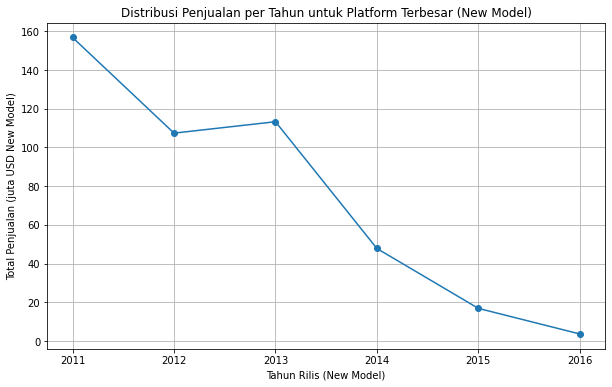

In [351]:
# Data distribusi penjualan per tahun
year_2011 = sales_platform_per_year_2011.index
sales_2011 = sales_platform_per_year_2011.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(year_2011, sales_2011, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Platform Terbesar (New Model)')
plt.xlabel('Tahun Rilis (New Model)')
plt.ylabel('Total Penjualan (juta USD New Model)')
plt.grid(True)
plt.show()


**Kesimpulan Sementara**

Dari data grafik diatas bahwasannya `PS3` akan semakin menyusuk dengan dilihat nya trend yang menurun dari tahun 2011 hingga tahun 2016

Mari untuk mengambil 3 sample dari yang dahulu populer sebelum `PS3`. Dan apakah mengalami penyusutan ?


In [352]:
# Menjumlahkan jumlah total penjualan untuk semua game (new model)
games_data_lifetime_2011 = pd.pivot_table(games_data_2011, index = 'year_of_release', values = 'total_sales', columns = 'platform', aggfunc = 'sum').fillna(0)



In [353]:
games_data_lifetime_2011

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00
2012,51.36,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Mengambil  3 sample yaitu `3DS`, `PS4`, `PS3`, `X360`

<AxesSubplot:xlabel='year_of_release'>

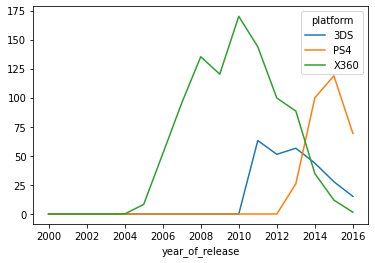

In [354]:
# Menampilkan total penjualan sesudah berakhirnya platform PS3

games_data_lifetime[['3DS', 'PS4', 'X360']].plot()

Dari grafik diatas dapat dilihat bahwasannya `PS4` memiliki trend bullish dimana grafik `PS4` menunjukkan ada nya kenaikan dibandingkan `PS3` yang artinya `PS4` merupakan sebuah upgrade dari `PS3` dan kemungkinan besar `PS4` memiliki performa yang bagus dibandingkan `PS3`. Dan pada tahun 2012 `PS4` memiliki transinsi untuk tumbuh disekitar tahun 2012

### Membuat Boxplot untuk Penjualan Global Semua Game yang Dikelompokan Berdasarkan Platform

Dengan model data yang baru, apakah perbedaan penjualannya signifikan? Bagaimana dengan penjualan rata-rata pada berbagai platform?

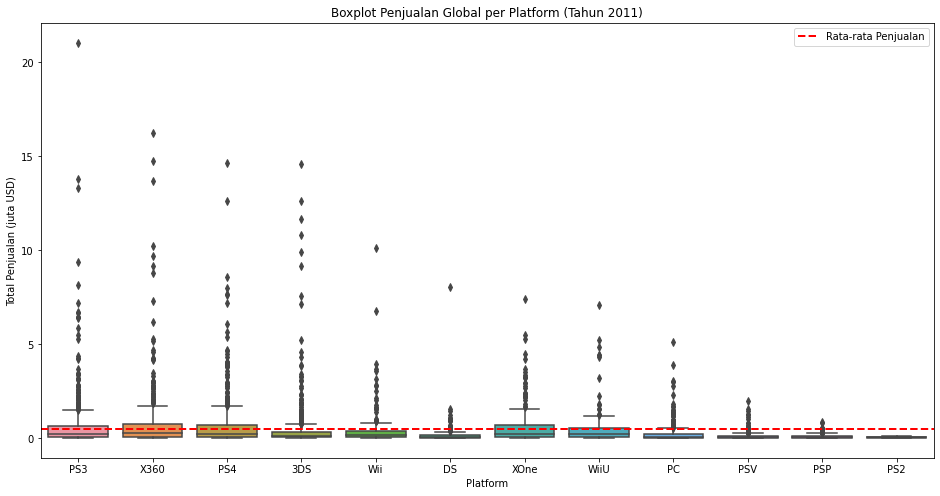

In [355]:
# membuat boxplot dengan rata-rata
plt.figure(figsize=(16, 8))
sns.boxplot(data=games_data_2011, x='platform', y='total_sales')
plt.title('Boxplot Penjualan Global per Platform (Tahun 2011)')
plt.xlabel('Platform')
plt.ylabel('Total Penjualan (juta USD)')

# Menambahkan garis rata-rata untuk setiap platform
plt.axhline(games_data_2011['total_sales'].mean(), color='r', linestyle='dashed', linewidth=2, label='Rata-rata Penjualan')
plt.legend()

plt.show()

In [356]:
games_data.groupby('platform').agg({'total_sales' : ['mean','median','max','min']}).reset_index()

platform total_sales                    
                   mean median    max   min
0       3DS    0.503535  0.120  14.60  0.01
1        DC    0.239032  0.120   1.81  0.02
2        DS    0.378660  0.110  29.80  0.01
3        GB    1.074074  0.810   6.39  0.07
4       GBA    0.385795  0.160  15.84  0.01
5        GC    0.362970  0.150   7.06  0.01
6       N64    0.532857  0.220   3.36  0.01
7        PC    0.224340  0.040   8.01  0.01
8        PS    0.513504  0.245   5.31  0.01
9       PS2    0.579953  0.230  20.81  0.00
10      PS3    0.713124  0.280  21.05  0.00
11      PS4    0.801378  0.200  14.63  0.01
12      PSP    0.242691  0.090   7.68  0.01
13      PSV    0.125431  0.050   1.96  0.01
14       WS    0.240000  0.210   0.51  0.03
15      Wii    0.692986  0.190  82.54  0.01
16     WiiU    0.559116  0.220   7.09  0.01
17     X360    0.780227  0.280  21.82  0.01
18       XB    0.313288  0.150   8.48  0.01
19     XOne    0.645020  0.220   7.39  0.01

**Kesimpulan Sementara**

Dapat dilihat dari grafik boxplot menerangkan bahwasannya ada nya garis batas berwarana merah untuk menerangkan batas rata - rata penjualan. Dari gambar diagram tersebut dapat dilihat bahwasannya penjulan `X360` masih signifikan, namun tidak menutup kemungkinan bahwasannya untuk penjualan `PS4` akan melonjak lebih tinggi. Dikarenakan dari analaisa sebelumnya platform `PS4` memiliki potensi cukup besar untuk tumbuh.

### Melihat Ulasan Pengguna dan Para Profesional Memengaruhi Penjualan Pada Salah Satu Platform Populer

Membuat scatter plot dan hitung korelasi antara ulasan dan penjualan. Kemudian kita akan coba pilih platform PS4.

In [357]:
# Mengiris hanya untuk ps4 untuk critic_score & user_score dengan nilai non null
# Mengiris hanya untuk PS4 untuk critic_score & user_score dengan nilai non-null
games_data_ps4_2011 = games_data_2011.groupby(['platform', 'name']).agg({
    'total_sales': 'sum',
    'critic_score': 'sum',
    'user_score': 'sum'
}).query('platform == "PS4" & critic_score > 0 & user_score > 0').reset_index()


In [358]:
games_data_ps4_2011

,platform,name,total_sales,critic_score,user_score
0,PS4,7 Days to Die,0.14,45.0,59.0
1,PS4,Aegis of Earth: Protonovus Assault,0.02,57.0,78.0
2,PS4,Agatha Christie's The ABC Murders,0.02,67.0,62.0
3,PS4,Alien: Isolation,1.12,79.0,81.0
4,PS4,Angry Birds Star Wars,0.22,47.0,20.0
...,...,...,...,...,...
247,PS4,World of Final Fantasy,0.34,77.0,83.0
248,PS4,Worms: WMD,0.03,78.0,76.0
249,PS4,XCOM 2,0.14,88.0,80.0
250,PS4,Zombie Army Trilogy,0.20,62.0,68.0


In [359]:
# Membuat korelasi untuk platform PS4 dengan total_sales
games_data_ps4_2011.corr()['total_sales']

total_sales     1.000000
critic_score    0.406568
user_score     -0.018112
Name: total_sales, dtype: float64

Korelasi antara `total_sales` dan `critic_score` adalah sekitar 0.15, yang cukup rendah. Ini menunjukkan bahwa ada hubungan positif lemah antara skor kritikus dan penjualan total. Artinya, game dengan skor kritikus yang lebih tinggi cenderung memiliki penjualan total yang lebih tinggi, tetapi hubungan ini tidak terlalu kuat.

Korelasi antara `total_sales` dan `user_score` sangat rendah, yaitu sekitar 0.03. Hal ini menunjukkan bahwa tidak ada hubungan linier yang signifikan antara skor pengguna dan penjualan total. Dengan kata lain, skor pengguna tidak memiliki pengaruh yang kuat terhadap penjualan total game.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

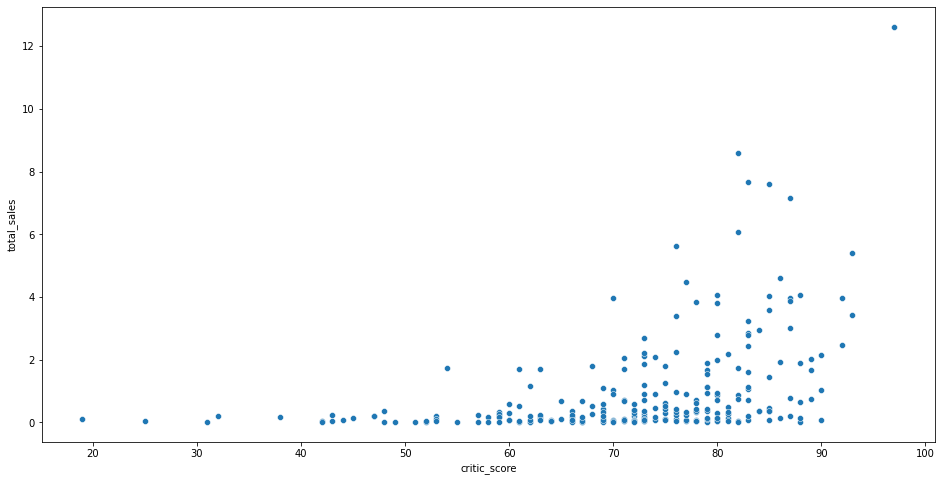

In [360]:
# Membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=games_data_ps4_2011, x = 'critic_score', y='total_sales' )

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

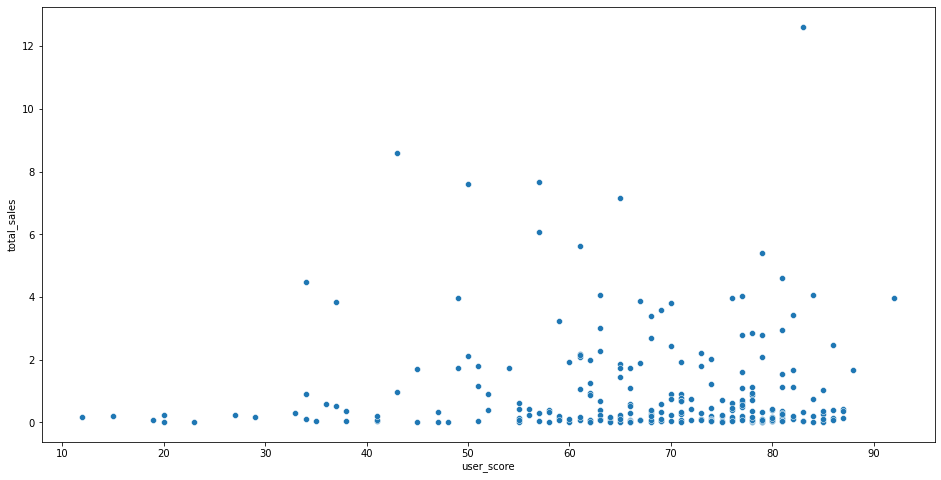

In [361]:
# Membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=games_data_ps4_2011, x = 'user_score', y='total_sales' )

**Kesimpulan Sementara**

Dari kedua yang ditampilkan bisa dipastikan bahwa scatter plot yang dibuat belum ada kolerasi yang kuat atau pola yang berbentuk linier.

### Melihat Kembali Ulasan dan Para Profesional dengan Platform yang Berbeda

In [362]:
# Mengiris hanya untuk X360 untuk critic_score & user_score dengan nilai non null
games_data_x360_2011 = games_data_2011.groupby(['platform', 'name']).agg({
    'total_sales': 'sum',
    'critic_score': 'sum',
    'user_score': 'sum'
}).query('platform == "X360" & critic_score > 0 & user_score > 0').reset_index()

In [363]:
games_data_x360_2011

,platform,name,total_sales,critic_score,user_score
0,X360,2014 FIFA World Cup Brazil,0.43,74.0,44.0
1,X360,Ace Combat: Assault Horizon,0.49,78.0,62.0
2,X360,Adventure Time: The Secret of the Nameless Kin...,0.05,58.0,75.0
3,X360,Air Conflicts: Secret Wars,0.09,61.0,23.0
4,X360,Alice: Madness Returns,0.49,70.0,81.0
...,...,...,...,...,...
291,X360,Zumba Fitness Core,0.05,77.0,67.0
292,X360,Zumba Fitness Rush,0.18,73.0,62.0
293,X360,[Prototype 2],0.79,74.0,70.0
294,X360,de Blob 2,0.15,77.0,75.0


In [364]:
# membuat korelasi untuk platform X360 dengan total_sales
games_data_x360_2011.corr()['total_sales']

total_sales     1.000000
critic_score    0.391253
user_score      0.041775
Name: total_sales, dtype: float64

Korelasi antara `total_sales` dan `critic_score` adalah sekitar 0.286, yang berarti ada hubungan positif antara keduanya. Ini menunjukkan bahwa ada kecenderungan bahwa game dengan skor kritikus yang lebih tinggi cenderung memiliki total penjualan yang lebih tinggi. Namun, nilai korelasinya tidak sangat tinggi, sehingga hubungan ini mungkin tidak sangat kuat.

Korelasi antara `total_sales` dan `user_score` (skor pengguna) adalah sekitar 0.108, yang juga menunjukkan hubungan positif antara keduanya. Artinya, ada kecenderungan bahwa game dengan skor pengguna yang lebih tinggi cenderung memiliki total penjualan yang lebih tinggi. Namun, seperti sebelumnya, nilai korelasinya tidak sangat tinggi.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

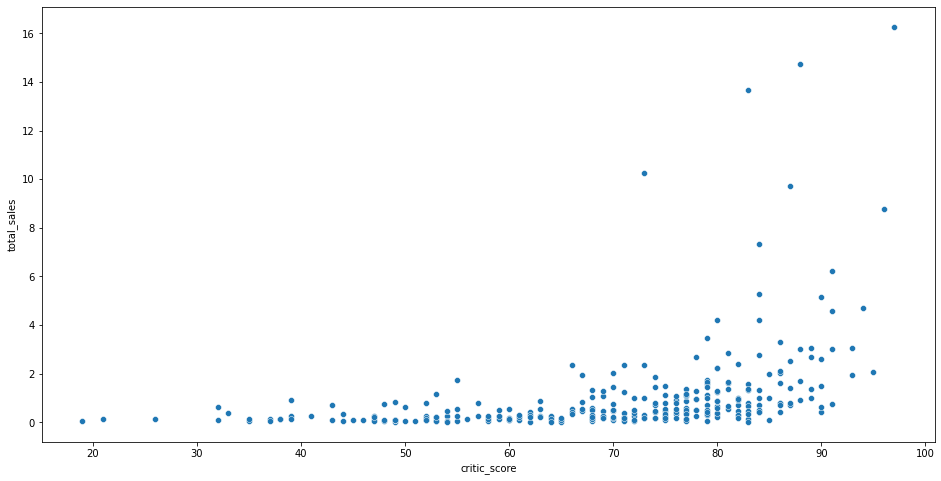

In [365]:
# Membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=games_data_x360_2011, x = 'critic_score', y='total_sales' )

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

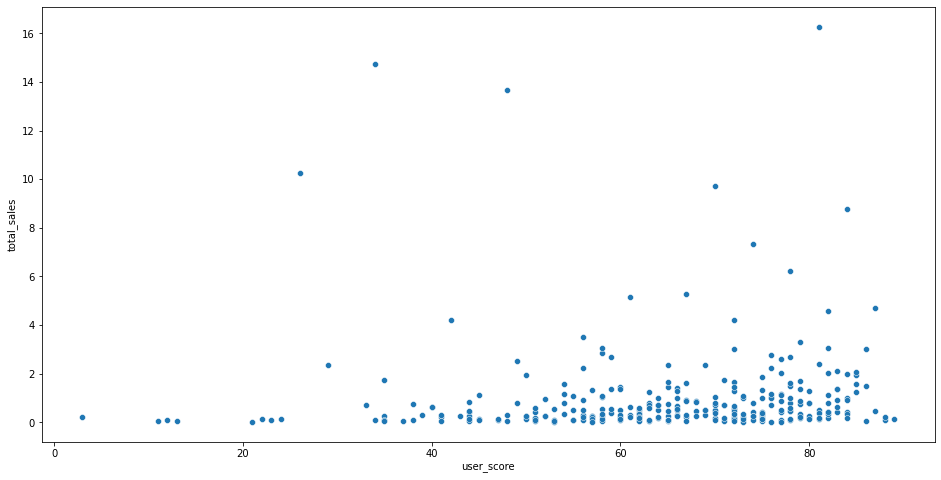

In [366]:
# Membuat scatterplot untuk masing-masing yang ditentukan
plt.figure(figsize = (16, 8))
sns.scatterplot(data=games_data_x360_2011, x = 'user_score', y='total_sales' )

**Kesimpulan Sementara**

Bisa dipastikan bahwa ke dua platform memiliki hasil yang mirip. X360 sebelumnya memiliki penjualan yang cukup tinggi untuk menembus tahun 2016. Namun tetap saja tidak membentuk pola linear untuk masing-masing kolom user_score dan critic_score terhadap kolom total_sales.

### Mengamati Distribusi Game Berdasarkan Pengamatan

Mencari kesimpulan terkait genre yang paling menguntungkan? Dan akan melakukan generalisasi terkait genre dengan penjualan yang tinggi dan rendah. Dimulai dari analisa yang paling tinggi setelah itu menganalisa penjualan yang paling rendah.

In [367]:
# Menganalisa distribusi paling tinggi pada genre
# Memeriksa distribusi genre dengan value_count

games_data_2011['genre'].value_counts()

Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         117
Puzzle            71
Name: genre, dtype: int64

In [368]:
# Memeriksa lebih detail distribusi genre dengan agregasi kolom total_sales
# Menghitung total penjualan untuk setiap genre
genre_high_sales_2011 = games_data_2011.groupby('genre')['total_sales'].sum().reset_index()

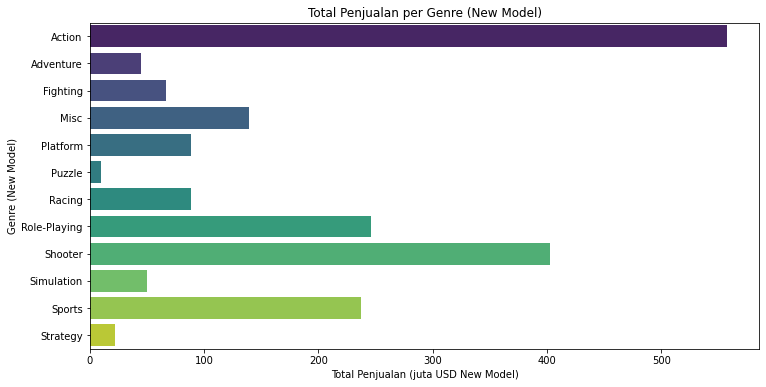

In [369]:
# Membuat bar plot visualisasi penjualan untuk platform
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='genre', data=genre_high_sales_2011, palette='viridis')
plt.title("Total Penjualan per Genre (New Model)")
plt.xlabel('Total Penjualan (juta USD New Model)')
plt.ylabel('Genre (New Model)')
plt.show()

Games untuk genre `action` memiliki total penjualan yang tinggi 

In [370]:
# Menemukan genre dengan total penjualan terbesar
biggest_genre_2011 = genre_high_sales_2011[genre_high_sales_2011['total_sales'] == genre_high_sales_2011['total_sales'].max()]
print("Genre dengan total penjualan terbesar :")
print(biggest_genre_2011)

Genre dengan total penjualan terbesar :
    genre  total_sales
0  Action        557.8


In [371]:
# Membuat distribusi genre terbesar untuk data new model
# Memilih data penjualan hanya untuk genre terbesar
data_biggest_genre_2011 = games_data_2011[games_data_2011['genre'] == biggest_genre_2011['genre'].values[0]]

# Membuat distribusi penjualan per tahun
genre_sales_per_year_2011 = data_biggest_genre_2011.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk genre terbesar (New Model):")
print(genre_sales_per_year_2011)


Distribusi penjualan per tahun untuk genre terbesar (New Model):
year_of_release
2011    116.68
2012    119.25
2013    122.51
2014     97.23
2015     72.02
2016     30.11
Name: total_sales, dtype: float64


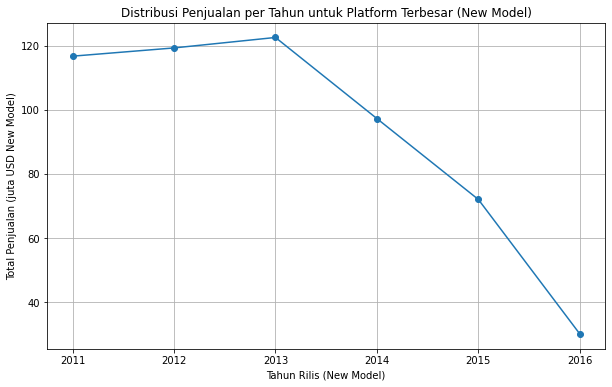

In [372]:
# Data distribusi penjualan per tahun
genre_year_2011 = genre_sales_per_year_2011.index
genre_sales_2011 = genre_sales_per_year_2011.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(genre_year_2011, genre_sales_2011, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Platform Terbesar (New Model)')
plt.xlabel('Tahun Rilis (New Model)')
plt.ylabel('Total Penjualan (juta USD New Model)')
plt.grid(True)
plt.show()


**Kesimpulan Sementara**

Dapat dilihat dari grafik diatas bahwasannya genre `action` sekitar tahun 2013 memiliki penjualan tertinggi dikarenakan banyaknya peminat dan penjualan pada genre`action` tersebut. Lalu setelah itu mengalami penurunan yang cukup signifikan.

In [373]:
# Memeriksa lebih detail distribusi genre dengan agregasi kolom total_sales (genre dengan nilai terendah)
# Menghitung total penjualan untuk setiap genre
lowest_sales_genre_2011 = games_data_2011.groupby('genre')['total_sales'].sum().reset_index()

In [374]:
# Menemukan genre dengan total penjualan terendah
lowest_genre_2011 = lowest_sales_genre_2011[lowest_sales_genre_2011['total_sales'] == lowest_sales_genre_2011['total_sales'].min()]
print("Genre dengan total penjualan terendah :")
print(lowest_genre_2011)

Genre dengan total penjualan terendah :
    genre  total_sales
5  Puzzle         9.85


In [375]:
# Membuat distribusi genre terendah untuk data new model
# Memilih data penjualan hanya untuk genre terbesar
lowest_genre_data_2011 = games_data_2011[games_data_2011['genre'] == lowest_genre_2011['genre'].values[0]]

# Membuat distribusi penjualan per tahun
lowest_sales_genre_per_year_2011 = lowest_genre_data_2011.groupby('year_of_release')['total_sales'].sum()

# Menampilkan distribusi penjualan
print("Distribusi penjualan per tahun untuk genre terendah (New Model):")
print(lowest_sales_genre_per_year_2011)


Distribusi penjualan per tahun untuk genre terendah (New Model):
year_of_release
2011    4.96
2012    1.72
2013    0.96
2014    1.49
2015    0.71
2016    0.01
Name: total_sales, dtype: float64


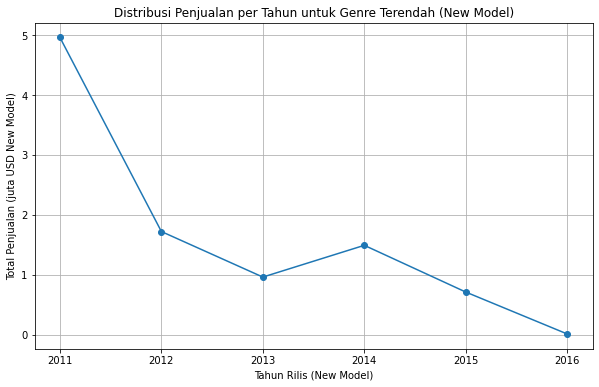

In [376]:
# Data distribusi penjualan per tahun
genre_lowest_year_2011 = lowest_sales_genre_per_year_2011.index
genre_lowest_sales_2011 = lowest_sales_genre_per_year_2011.values

# Membuat plot
plt.figure(figsize=(10, 6))
plt.plot(genre_lowest_year_2011, genre_lowest_sales_2011, marker='o', linestyle='-')
plt.title('Distribusi Penjualan per Tahun untuk Genre Terendah (New Model)')
plt.xlabel('Tahun Rilis (New Model)')
plt.ylabel('Total Penjualan (juta USD New Model)')
plt.grid(True)
plt.show()


**Kesimpulan Sementara**

Dari grafik diatas dapat dilihat bahwsannya genre game dengan genre `Puzzle` cukup sedikit peminat, dari tahun 2011 hingga tahun 2016 terus ada nya penurunan walaupun di tahun 2013 terdapat kenaikan sedikit tetapi setelah itu terjadi penurunan yang cukup drastis.

## Melakukan Pemprofilan Pengguna untuk Masing - Masing Wilayah

Untuk setiap wilayah `NA, EU, JP` tentukan:

1. 5 platform teratas, dan menjelaskan variasi pangsa pasar dari satu wilayah ke wilayah lainnya.
2. 5 genre teratasm dan jelaskan perbedaannya.
3. Apakah rating `ESRB` memengaruhi penjualan di masing-masing wilayah?

In [377]:
#Preview data

games_data_2011.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,6.0,NaN,14.63
4,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,75.0,NaN,14.60


In [378]:
# Memeriksa platform berdasarkan total_sales
games_data_2011.groupby('platform')['total_sales'].sum().sort_values().reset_index()

,platform,total_sales
0,PS2,0.45
1,PSP,29.01
2,DS,38.73
3,PSV,53.81
4,WiiU,82.19
5,Wii,95.02
6,PC,97.68
7,XOne,159.32
8,3DS,257.81
9,PS4,314.14


In [379]:
# Mengagregasikan dan mengelompokan platform berdasarkan wilayah yang ditentukan
sales_sector_platform = games_data_2011.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
sales_sector2_platform = games_data_2011.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()


In [380]:
sales_sector2_platform['total_sales'] = sales_sector2_platform[['na_sales', 'eu_sales', 'jp_sales']].sum(axis = 1)


sales_sector2_platform

,platform,na_sales,eu_sales,jp_sales,total_sales
0,3DS,82.65,61.27,100.62,244.54
1,DS,18.86,9.24,8.04,36.14
2,PC,29.88,56.70,0.00,86.58
3,PS2,0.13,0.13,0.09,0.35
4,PS3,168.26,163.10,49.39,380.75
5,PS4,108.74,141.09,15.96,265.79
6,PSP,2.19,1.77,24.04,28.00
7,PSV,12.47,13.07,21.84,47.38
8,Wii,48.56,29.60,8.97,87.13
9,WiiU,38.10,25.13,13.01,76.24


<Figure size 1440x576 with 0 Axes>

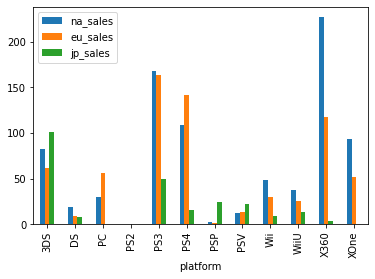

In [381]:
plt.figure(figsize=(20,8))
sales_sector_platform.plot(kind = 'bar');

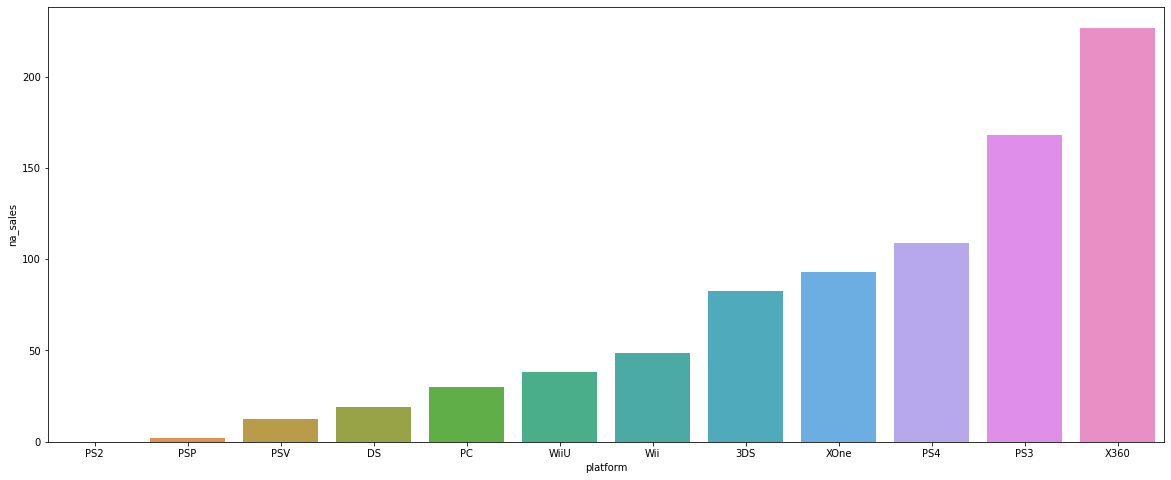

In [382]:
plt.figure(figsize=(20,8))
sns.barplot(data = sales_sector2_platform.sort_values(by='na_sales'), x = 'platform', y = 'na_sales' );

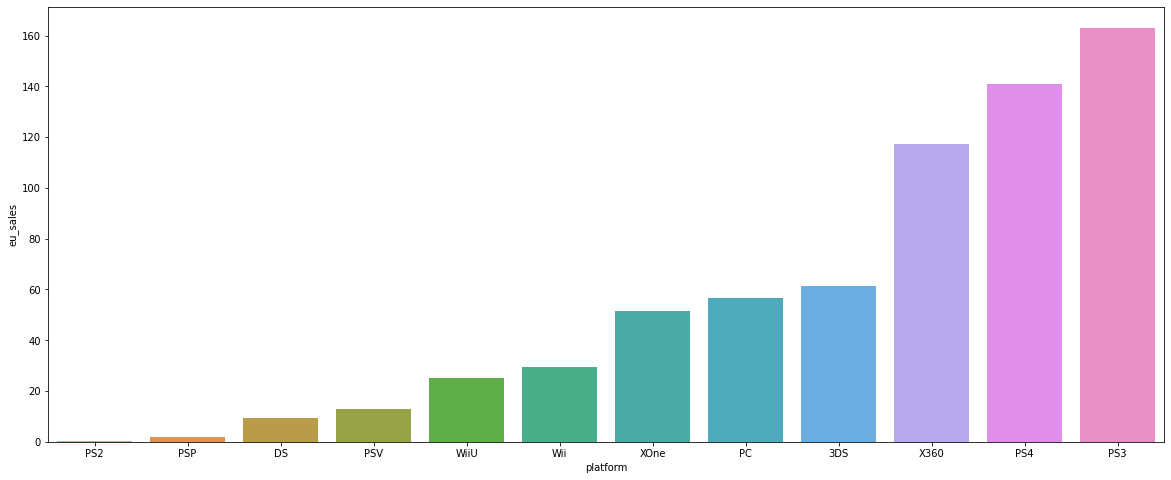

In [383]:
plt.figure(figsize=(20,8))
sns.barplot(data = sales_sector2_platform.sort_values(by='eu_sales'), x = 'platform', y = 'eu_sales' );

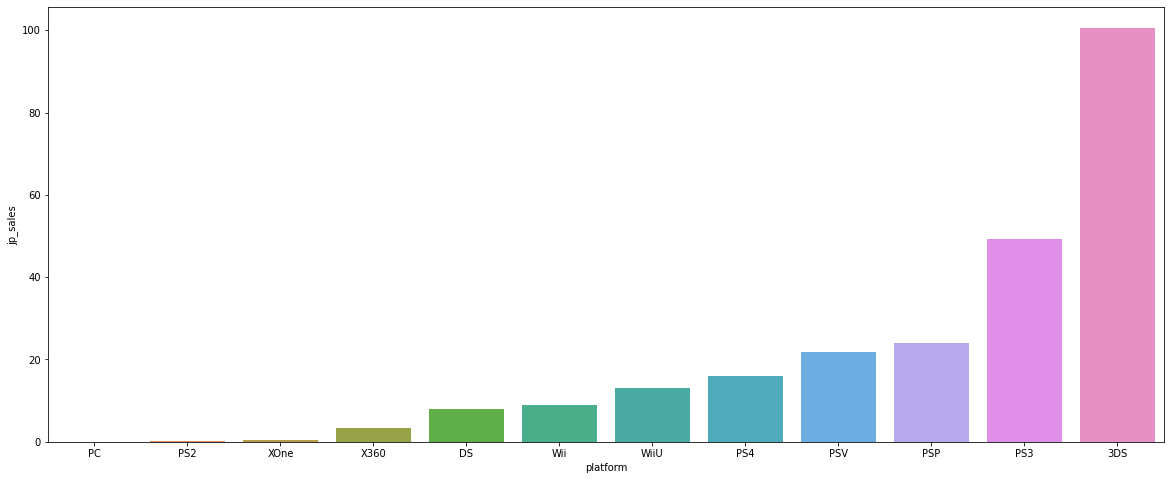

In [384]:
plt.figure(figsize=(20,8))
sns.barplot(data = sales_sector2_platform.sort_values(by='jp_sales'), x = 'platform', y = 'jp_sales' );

**Kesimpulan Sementara**

`5 Platform Teratas untuk Sektor NA`:
X360
PS3
PS4
XOne
3DS

`5 Platform Teratas untuk Sektor EU`:
PS3
PS4
X360
3DS
PC

`5 Platform Teratas untuk Sektor JP`:
3DS
PS3
PSP
PSV
PS4

### Menghintung 5 Genre Teratas

In [385]:
# Mengagregasikan dan mengelompokan genre berdasarkan wilayah yang ditentukan
genre_sales_sector = games_data_2011.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
genre_sales_sector2 = games_data_2011.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

In [386]:
genre_sales_sector2['total_sales'] = genre_sales_sector2[['na_sales', 'eu_sales', 'jp_sales']].sum(axis = 1)

genre_sales_sector2

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Action,230.92,199.12,63.62,493.66
1,Adventure,14.76,13.96,12.07,40.79
2,Fighting,31.63,16.24,12.38,60.25
3,Misc,69.69,39.72,17.60,127.01
4,Platform,38.28,30.07,12.13,80.48
5,Puzzle,2.74,3.56,2.91,9.21
6,Racing,31.98,40.58,5.64,78.20
7,Role-Playing,83.78,62.30,79.87,225.95
8,Shooter,194.43,148.02,11.92,354.37
9,Simulation,15.37,19.72,11.64,46.73


<Figure size 1440x576 with 0 Axes>

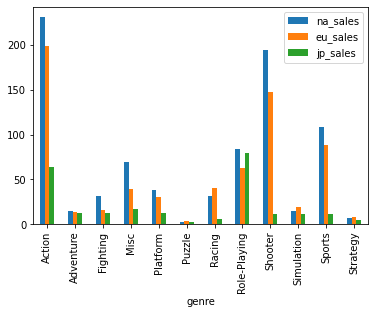

In [387]:
plt.figure(figsize=(20,8))
genre_sales_sector.plot(kind = 'bar');

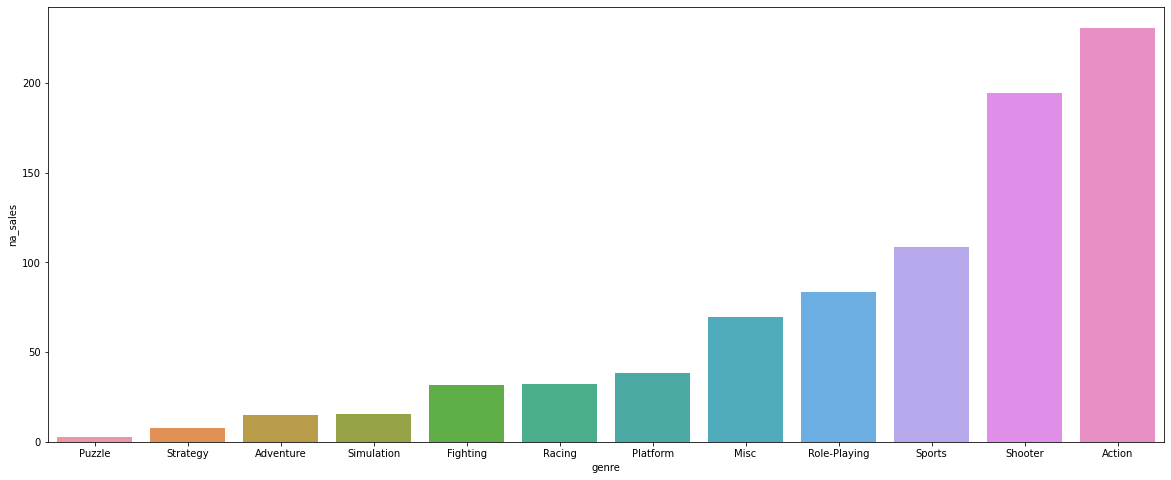

In [388]:
plt.figure(figsize=(20,8))
sns.barplot(data = genre_sales_sector2.sort_values(by='na_sales'), x = 'genre', y = 'na_sales' );

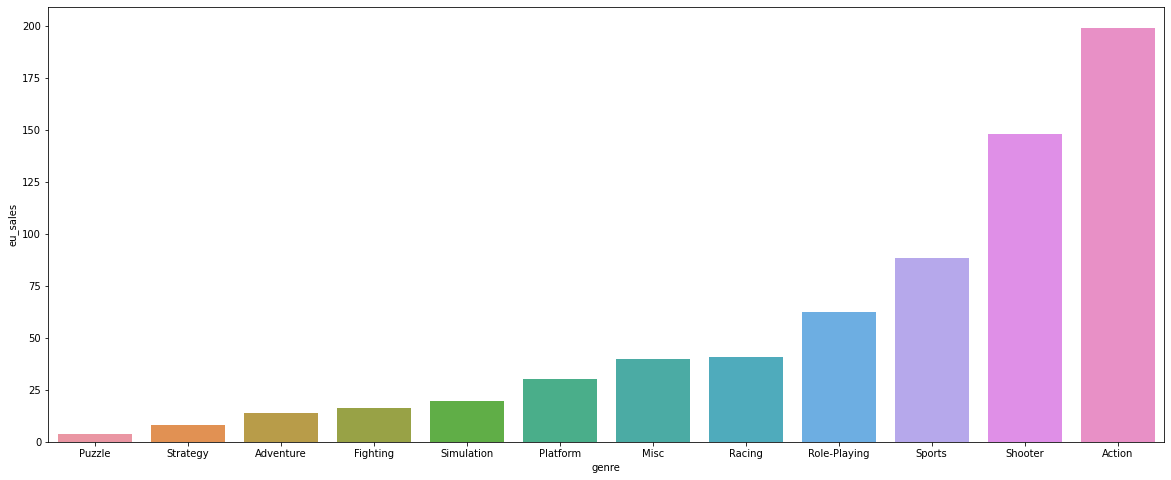

In [389]:
plt.figure(figsize=(20,8))
sns.barplot(data = genre_sales_sector2.sort_values(by='eu_sales'), x = 'genre', y = 'eu_sales' );

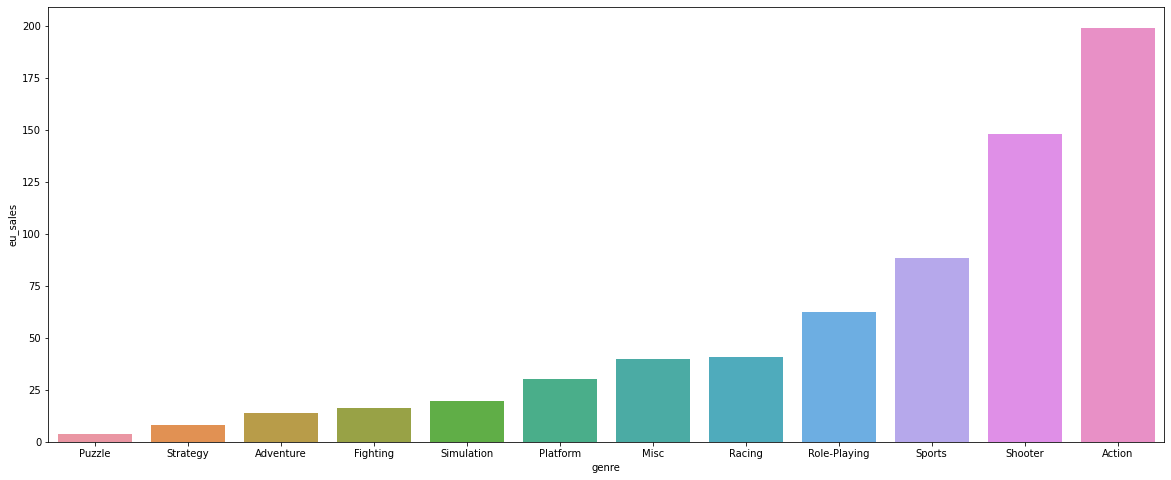

In [390]:
plt.figure(figsize=(20,8))
sns.barplot(data = genre_sales_sector2.sort_values(by='eu_sales'), x = 'genre', y = 'eu_sales' );

**Kesimpulan Sementara**

`5 Genre Teratas untuk Sektor NA`:
Action, Shooter, Sports, Role-Playing, Misc

`5 Genre Teratas untuk Sektor EU`:
Action, Shooter, Sports, Role-Playing, Racing

`5 Genre Teratas untuk Sektor JP`:
Action, Shooter, Sports, Role-Playing, Racing

## Menguji Hipotesis Rata- Rata Rating Pengguna Platform Xbox One dan PC

1. Bagaimana kita merumuskan hipotesis nol dan hipotesis alternatif ?
2. Berapa tingkat signifikansi yang kita pilih untuk menguji hipotesis ?

`Hipotesis yang kita gunakan`:

`Rata-rata rating pengguna platform Xbox One dan PC adalah sama.`

`Rata-rata rating pengguna genre Action dan Sports berbeda`

### Uji Hipotesis Platform Xbox One dan PC

- <font color='blue'>H0 : Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.</font>
- <font color='red'>H1 : Rata-rata rating pengguna platform Xbox One dan PC adalah TIDAK SAMA.</font>

`Alpha : 0.05`

In [391]:
# Memeriksa value
games_data_2011['platform'].value_counts()

PS3     708
3DS     512
X360    498
PSV     429
PS4     392
PC      389
PSP     312
XOne    247
Wii     197
DS      184
WiiU    147
PS2       7
Name: platform, dtype: int64

In [392]:
# Memfilter kolom yang akan digunakan untuk hipotesis
games_data_2011_pc = games_data_2011[(games_data_2011['platform'] == 'PC') & (games_data_2011['user_score'])]
games_data_2011_xone = games_data_2011[(games_data_2011['platform'] == 'XOne') & (games_data_2011['user_score'])]

In [393]:
games_data_2011_pc.shape, games_data_2011_xone.shape

((389, 12), (247, 12))

In [394]:
xone_user_ratings = games_data_2011[games_data_2011['platform'] == 'XOne']['user_score']
pc_user_ratings = games_data_2011[games_data_2011['platform'] == 'PC']['user_score']

print('XBox One user ratings variance:', np.var(xone_user_ratings).round(2))
print('PC user ratings variance:', np.var(pc_user_ratings).round(2))

XBox One user ratings variance: 370.83
PC user ratings variance: 415.34


In [395]:
alpha = 0.05
results_1 = st.ttest_ind(xone_user_ratings, pc_user_ratings, equal_var=False, nan_policy='omit')

# Print p-value
print('p-value:',results_1.pvalue) 

# compared the p-value to significance level
if results_1.pvalue < alpha:
    print("Rata-rata rating pengguna platform Xbox One dan PC adalah TIDAK SAMA.")
else:
    print("Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.")

p-value: 0.5316093366345791
Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.


**Kesimpulan Sementara**

Uji hipotesis untuk platform Xbox One dan PC ialah `Menerima H0` bahwasannya rata - rata rating pengguna platfom Xbox One dan PC ialah sama.

### Uji Hipotesis Genre Action dan PC

- <font color='blue'>H0 : Rata-rata rating pengguna genre Action dan Sports TIDAK SAMA.</font>
- <font color='red'>H1 : Rata-rata rating pengguna genre Action dan Sports SAMA.</font>

Alpha : `0.05`

In [396]:
# Memfilter kolom yang akan digunakan untuk hipotesis
games_data_2011_action = games_data_2011[(games_data_2011['genre'] == 'Action') & (games_data_2011['user_score'])]
games_data_2011_sports = games_data_2011[(games_data_2011['genre'] == 'Sports') & (games_data_2011['user_score'])]

In [397]:
games_data_2011_action.shape, games_data_2011_sports.shape

((1267, 12), (386, 12))

In [398]:
action_user_ratings = games_data_2011[games_data_2011['genre'] == 'Action']['user_score']
sports_user_ratings = games_data_2011[games_data_2011['genre'] == 'Sports']['user_score']

print('User ratings of Action genre variance:', np.var(action_user_ratings).round(2))
print('User ratings of Sports genre variance:', np.var(sports_user_ratings).round(2))

User ratings of Action genre variance: 554.59
User ratings of Sports genre variance: 490.26


In [399]:
alpha = 0.05
results_1 = st.ttest_ind(action_user_ratings, sports_user_ratings, equal_var=False, nan_policy='omit')

# Print p-value
print('p-value:',results_1.pvalue) 

# Ccompared the p-value to significance level
if results_1.pvalue < alpha:
    print("Rata-rata rating pengguna genre Action dan Sports SAMA (Menerima H1).")
else:
    print("Rata-rata rating pengguna genre Action dan Sports TIDAK SAMA. (Menerima H0)")

p-value: 4.5242849699625753e-07
Rata-rata rating pengguna genre Action dan Sports SAMA (Menerima H1).


**Kesimpulan Sementara**

Uji hipotesis untuk platform Xbox One dan PC `Menerima H1` dimana rata - rata rating pengguna genre Action One dan Sprots adalah sama. 

## Kesimpulan Umum

Untuk persiapan analisa data dari dataset yang akan digunakan cukup banyak melibatlan pembersihan data, memeriksa kesesuaian tipe data dan hal lainnya, dan ada nya manipulasi data supaya sesuai dengan analisis seperti mengganti nama kolom mengunakan lowercase, memanipulasi data yang tidak relevan, lalu mengkonversi tipe data.

Pada dataset games_data  memiliki 16715 entries, dan 11 kolom yang terdiri dari ; `name`, `platform`, `year_of_release`, `genre`, `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `critict_score`, `user_score`, `rating`. Lalu diawal terdapat nilai kosong pada kolom; `name`, `year_of_release`, `critic_score`, `user_score`, `rating`. Dan tedapat beberapa data yang hilang dan tidak simetris.

Mengubah tipe data `year_of_release` sebagai `int64` supaya mempermudah untuk memfilter tahun, menggunakan `pd.to_datetime` merupakan hal yang tidak direkomendasikan, dikarenakan memiliki detai tanggal sedangkan kita hanya memperlukan tahun rilisnya saja, menangani nilai yang hilang pada data dengan mengurut berdasarkan nilai yang hilang, mengabaikan nilai kosong yang jumlah nya sedikit seperti pada kolom name dan genre.

Kita bisa lihat dengan plot yang dihasilkan, bahwa pada tahun 2008-2009 merupakan puncak performa sebuah game yang berfrekuensi tinggi. Setelah ke 2 tahun itu lewat, penjualan jumlah game di tahun yang berbeda mengalami penurunan yang cukup signifikan. Dapat di asumsikan dari data tersebut bahwa besarnya popularitas diakibatkan oleh banyaknya total penjualan untuk setiap tahunnya.

Platform terbesar pada penjualan ini di rentang tahun 2000 hingga 2016 adalah `PS2` dengan total penjualan sekitar 1233.56 juta USD. Platform tersebut mengalami penurunan disekitar tahun 2010, yang berarti `PS2` mengalami kejadian ini cukup lama yaitu tumbuh dan memudarnya sekitar 10 tahun. Untuk permodelan baru saat ini PS3 memiliki potensi besar untuk penjualan. Namun kita bisa mengetahui bahwa popularitas `X360` masih banyak dalam high demand. Besar kemungkinan `PS4` akan mungkin menyusul keduanya. Dapa dipastikan bahwa penjualan `PS3` akan semakin menyusut dikarenakan trend yang akan datang.

Dan dapat dilihat bahwa `PS4` memiliki kemungkinan besar untuk tumbuh di tahun-tahun berikutnya. Hal ini merupakan memang sudah jelas karena `PS4` merupakan sebuah upgrade dari `PS3` yang memungkinkan untuk mewadahi game-game dengan performa yang lebih tinggi. Mungkin kita bisa beranggapan bahwa `PS4` sedang menuju transisi untuk tumbuh atau baru saja rilis di sekitar tahun 2012. Dengan garis merah yang telah buat dapat mengetahui penjualan yang di atas rata-rata. Penjualan pada platform `X360` masih signifikan, namun tidak menutup kemungkinan bahwa penjualan `PS4` akan melonjak lebih tinggi. Hal ini dikarenakan dari kesimpulan sementara pada sub bab sebelumnya, bahwa platform `PS4` memiliki potensial cukup besar untuk tumbuh.


Bisa dipastikan bahwa ke dua platform memiliki hasil yang mirip. `X360` sebelumnya memiliki penjualan yang cukup tinggi untuk menembus tahun 2016. Namun tetap saja tidak membentuk pola linear untuk masing-masing kolom `user_score` dan `critic_score` terhadap kolom `total_sales`. Pada sekitar tahun 2013 game `action` sangatlah tinggi. Hal ini dengan minat yang banyak dan juga total penjualan yang banyak di tahun tersebut. Setelah itu mengalami penurunan cukup signifikan dalam kurun waktu 3 tahun. Dipastikan genre `puzzle` merupakan genre yang memiliki penurunan signifikan pada setiap tahunnya. Puncak distribusi berada di tahun 2011 dan menurun hingga 5 tahun. Besar kemungkinan minat untuk game ber genre seperti itu sangatlah kurang.


- Pemfilteran Platform Teratas Untuk Setiap Wilayah:

5 Platform teratas untuk sektor `NA` yaitu:

1.	X360

2.	PS3

3.	PS4

4.	XOne

5.	3DS

5 Platform teratas untuk sektor `EU` yaitu:

1.	PS3

2.	PS4

3.	X360

4.	3DS

5.	PC

5 Platform teratas untuk sektor `JP` yaitu:

1.	3DS

2.	PS3

3.	PSP

4.	PSV

5.	PS4






- Pemfilteran Genre Teratas Untuk Setiap Wilayah:

5 Genre teratas untuk sektor `NA` yaitu:

1.	Action

2.	Shooter

3.	Sports

4.	Role-Playing

5.	Misc

5 Genre teratas untuk sektor `EU` yaitu:

1.	Action

2.	Shooter

3.	Sports

4.	Role-Playing

5.	Racing

5 Genre teratas untuk sektor `JP` yaitu:

1.	Action

2.	Shooter

3.	Sports

4.	Role-Playing

5.	Racing



- Hasil Uji Hipotesis:

Uji Hipotesis untuk platform `Xbox One` dan `PC`: `Menerima H0`: Rata-rata rating pengguna platform Xbox One dan PC adalah SAMA.

Uji hipotesis untuk platform `Xbox One` dan `PC` : `Menerima H1` : Rata - rata rating pengguna genre Action One dan Sprots adalah SAMA. 